In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import openpyxl

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, plot_confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, ReLU
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# import dataset
df_train = pd.read_csv("https://raw.githubusercontent.com/galib96/occupancy-detection-uci-data/main/DATASET/datatraining.txt", sep=",")

# check shape of the dataset
print(df_train.shape)

# check overview of the trainset
df_train.head()

(8143, 7)


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [ ]:
# import dataset
df_test_1 = pd.read_csv("https://raw.githubusercontent.com/galib96/occupancy-detection-uci-data/main/DATASET/datatest.txt", sep=",")

# check shape of the dataset
print(df_test_1.shape)

# check overview of the trainset
df_test_1.head()

(2665, 7)


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [ ]:
# import dataset
df_test_2 = pd.read_csv("https://raw.githubusercontent.com/galib96/occupancy-detection-uci-data/main/DATASET/datatest2.txt", sep=",")

# check shape of the dataset
print(df_test_2.shape)

# check overview of the trainset
df_test_2.head()

(9752, 7)


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [ ]:
df_train.drop('date',inplace=True, axis=1)
df_test_1.drop('date',inplace=True, axis=1)
df_test_2.drop('date',inplace=True, axis=1)

df_train.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.18,27.2720,426.0,721.25,0.004793,1
2,23.15,27.2675,429.5,714.00,0.004783,1
3,23.15,27.2450,426.0,713.50,0.004779,1
4,23.15,27.2000,426.0,708.25,0.004772,1
5,23.10,27.2000,426.0,704.50,0.004757,1


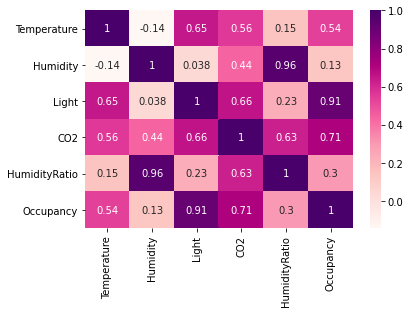

In [ ]:
corr = df_train.corr(method='pearson')
sns.heatmap(corr, cmap="RdPu", annot=True)

In [ ]:
df_train.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(len(df_train.columns))

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,0.000000e+00,8.045844e-38,0.000000e+00,0.0,3.731142e-43,0.000000e+00
Humidity,8.045844e-38,0.000000e+00,6.396081e-04,0.0,0.000000e+00,1.934809e-33
Light,0.000000e+00,6.396081e-04,0.000000e+00,0.0,1.384224e-98,0.000000e+00
CO2,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
HumidityRatio,3.731142e-43,0.000000e+00,1.384224e-98,0.0,0.000000e+00,2.618819e-169
Occupancy,0.000000e+00,1.934809e-33,0.000000e+00,0.0,2.618819e-169,0.000000e+00


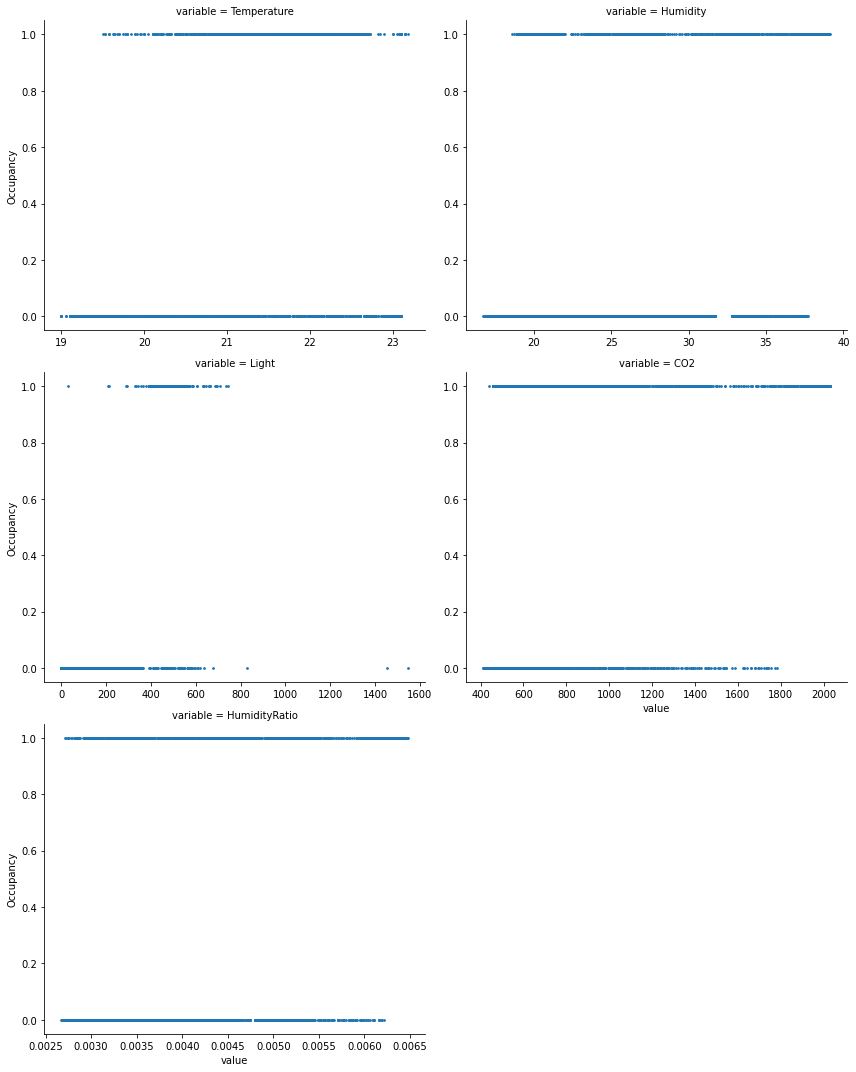

In [ ]:
features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']

# scatter plots
temp = pd.melt(df_train, id_vars=['Occupancy'],value_vars=features)
grid = sns.FacetGrid(temp, col="variable",  col_wrap=2 , height=5.0, 
                     aspect=1.2,sharex=False, sharey=False)
grid.map(plt.scatter, "value",'Occupancy', s=3)
plt.show()

In [ ]:
unoccupied = df_train[df_train['Occupancy'] == 0] # filtering only non-fraud cases
occupied = df_train[df_train['Occupancy'] == 1] # filtering fraud cases

print("Count of unoccupied class: ")
print(unoccupied['Occupancy'].count())

print("Count of occupied class: ")
print(occupied['Occupancy'].count())

Count of unoccupied class: 
6414
Count of occupied class: 
1729


In [ ]:
data_comb = df_train.copy()

print(data_comb.shape)

data_comb.head()

(8143, 6)


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.18,27.2720,426.0,721.25,0.004793,1
2,23.15,27.2675,429.5,714.00,0.004783,1
3,23.15,27.2450,426.0,713.50,0.004779,1
4,23.15,27.2000,426.0,708.25,0.004772,1
5,23.10,27.2000,426.0,704.50,0.004757,1


In [ ]:
# standard normalization of independent variable columns

stdnorm = StandardScaler()

features = list(data_comb.columns[:-1])

data_comb[features] = stdnorm.fit_transform(data_comb[features])
df_test_1[features] = stdnorm.transform(df_test_1[features])
df_test_2[features] = stdnorm.transform(df_test_2[features])

data_comb.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2.518470,0.278526,1.573763,0.364948,1.091757,1
2,2.488967,0.277713,1.591735,0.341881,1.080555,1
3,2.488967,0.273645,1.573763,0.340290,1.075888,1
4,2.488967,0.265508,1.573763,0.323587,1.066555,1
5,2.439796,0.265508,1.573763,0.311655,1.049523,1


In [ ]:
df_test_1.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,3.029851,0.097723,2.391247,0.453875,1.057936,1
141,3.047553,0.100977,2.356329,0.489510,1.067907,1
142,3.059354,0.090129,2.326889,0.518993,1.059097,1
143,3.051978,0.071145,1.921656,0.535167,1.034012,1
144,3.082956,0.084705,1.895211,0.548689,1.060788,1


In [ ]:
# taking different feature sets for training

columns = [
    #'Temperature',
    #'Humidity',
    'Light', 
    #'CO2', 
    'HumidityRatio',
    'Occupancy']

data = data_comb[columns]
df_test1 = df_test_1[columns]
df_test2 = df_test_2[columns]

In [ ]:
# def train_set_creator(df):
#     X_train = df.drop('Occupancy', axis=1).values # features
#     y_train = df['Occupancy'].values # labels
#     return X_train, y_train

def test_set_creator(df):
    X_t = df.drop('Occupancy', axis=1).values # features
    y_t = df['Occupancy'].values # labels
    return X_t, y_t

In [ ]:
X = data.drop('Occupancy', axis=1).values
y = data['Occupancy'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2, 
    random_state = 1
    )

print(X_train.shape)

(6514, 2)


In [ ]:
X_test1, y_test1 = test_set_creator(df_test1)
X_test2, y_test2 = test_set_creator(df_test2)

In [ ]:
smt = BorderlineSMOTE(sampling_strategy=1.0, kind= "borderline-1")
X_arr, y_arr = smt.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_arr[y_arr==1].shape

(6414,)

In [ ]:
# Creating function to get a untrained model from tensorflow
tf.keras.backend.clear_session()
tf.random.set_seed(10)

def get_model():
  model = Sequential([ 
        Dense(512, input_shape=(X_arr.shape[1],)),
        ReLU(),
        BatchNormalization(),
        Dropout(0.2),

        Dense(512),
        ReLU(),
        BatchNormalization(),
        Dropout(0.2),

        Dense(1024),
        ReLU(),
        BatchNormalization(),
        Dropout(0.25),

        Dense(1024),
        ReLU(),
        BatchNormalization(),
        Dropout(0.25),

        Dense(1024),
        ReLU(),
        BatchNormalization(),
        Dropout(0.25),

        Dense(1024),
        ReLU(),
        BatchNormalization(),
        Dropout(0.2),

        Dense(1024),
        ReLU(),
        BatchNormalization(),
        Dropout(0.2),

        Dense(1024),
        ReLU(),
        BatchNormalization(),
        Dropout(0.2),

        Dense(1024),
        ReLU(),
        BatchNormalization(),
        Dropout(0.2),

        Dense(1024),
        ReLU(),
        BatchNormalization(),
        Dropout(0.15),

        Dense(1024),
        ReLU(),
        BatchNormalization(),
        Dropout(0.15),

        Dense(512),
        ReLU(),
        BatchNormalization(),
        Dropout(0.15),

        Dense(512),
        ReLU(),
        BatchNormalization(),
        Dropout(0.1),

        Dense(512),
        ReLU(),
        BatchNormalization(),
        Dropout(0.1),

        Dense(256),
        ReLU(),
        BatchNormalization(),
        Dropout(0.1),
        
        Dense(1, activation='sigmoid')
    ])
  
  model.compile(
        loss='binary_crossentropy',
        optimizer=RMSprop(learning_rate=0.0001) ,
        metrics=['binary_accuracy']
    )
  
  return model

get_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1536      
_________________________________________________________________
re_lu (ReLU)                 (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
re_lu_1 (ReLU)               (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2

In [ ]:
# running training on tensorflow DNN

class CustomStopper(tf.keras.callbacks.EarlyStopping):
    def __init__(self, monitor='val_loss',
             patience=7, verbose=0, restore_best_weights=True, mode='min', start_epoch = 15): # add argument for starting epoch
        super(CustomStopper, self).__init__()
        self.start_epoch = start_epoch

    def on_epoch_end(self, epoch, logs=None):
        if epoch > self.start_epoch:
            super().on_epoch_end(epoch, logs)

lr_call = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min'
    )

cb = CustomStopper()
model = get_model()

history = model.fit(
    X_arr, y_arr,
    batch_size = 64,
    validation_split = 0.2,
    epochs=500,
    callbacks=[cb, lr_call]
)

Epoch 1/500
161/161 [==============================] - 42s 222ms/step - loss: 0.5855 - binary_accuracy: 0.7009 - val_loss: 1.7918 - val_binary_accuracy: 0.0000e+00
Epoch 2/500
161/161 [==============================] - 35s 217ms/step - loss: 0.1514 - binary_accuracy: 0.9630 - val_loss: 0.2956 - val_binary_accuracy: 0.8995
Epoch 3/500
161/161 [==============================] - 35s 214ms/step - loss: 0.1157 - binary_accuracy: 0.9734 - val_loss: 0.0538 - val_binary_accuracy: 0.9622
Epoch 4/500
161/161 [==============================] - 34s 214ms/step - loss: 0.1001 - binary_accuracy: 0.9783 - val_loss: 0.0163 - val_binary_accuracy: 1.0000
Epoch 5/500
161/161 [==============================] - 35s 217ms/step - loss: 0.0880 - binary_accuracy: 0.9783 - val_loss: 0.0099 - val_binary_accuracy: 1.0000
Epoch 6/500
161/161 [==============================] - 35s 216ms/step - loss: 0.0823 - binary_accuracy: 0.9807 - val_loss: 0.0024 - val_binary_accuracy: 1.0000
Epoch 7/500
161/161 [===============

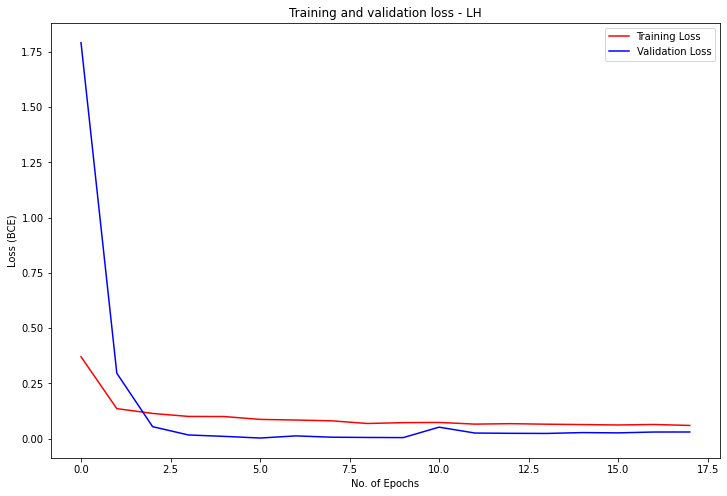

In [ ]:
# result of the model training

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure(figsize=(12,8))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss - LH') ##########
plt.xlabel('No. of Epochs')
plt.ylabel('Loss (BCE)')
plt.legend()

plt.savefig('/content'+'/ANN Training and Validation Loss - '+'LH Borderline 1.png',dpi=300) ##########

plt.show()

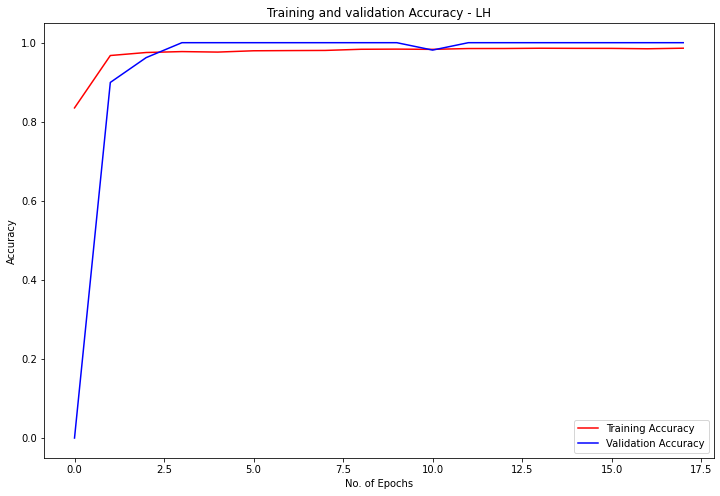

In [ ]:
# result of the model training

accuracy = history.history['binary_accuracy']
val_accuracy = history.history['val_binary_accuracy']

epochs = range(len(loss))

plt.figure(figsize=(12,8))

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy - LH') ########
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig('/content'+'/ANN Training and Validation Accuracy - '+'LH Borderline 1.png',dpi=300) #########

plt.show()

In [ ]:
# Creating Random Forest Tree model

ypred = model.predict(X_test)
ypred_test1 = model.predict(X_test1)
ypred_test2 = model.predict(X_test2)

dl_ypred = np.where(ypred >= 0.5, 1,0)
dl_ypred_test1 = np.where(ypred_test1 >= 0.5, 1,0)
dl_ypred_test2 = np.where(ypred_test2 >= 0.5, 1,0)

print("prediction done.")

prediction done.


ANN Training
[[1252   18]
 [   1  358]]
ANN Test 1
[[1638   55]
 [   3  969]]
ANN Test 2
[[7564  139]
 [  13 2036]]


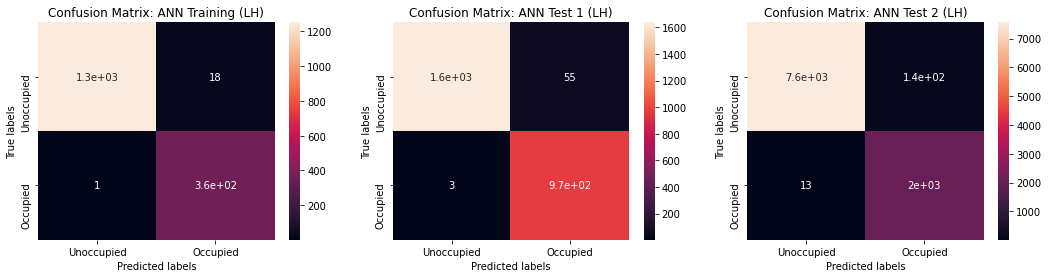

In [ ]:
# model names, models and predicted values for each model
models = {'ANN Training':[model, dl_ypred, y_test, X_test],
        'ANN Test 1':[model, dl_ypred_test1, y_test1, X_test1],
        'ANN Test 2':[model, dl_ypred_test2, y_test2, X_test2]}

# list of classes
class_names = ['Unoccupied','Occupied']

# blank dictionaries for saving evaluation metrics for each model 
accuracy = {}
f1_score_dict = {}
precision = {}
recall = {}

i = 1

plt.figure(figsize=(18,4))

for model, model_output in models.items():
    acc = accuracy_score(model_output[2], model_output[1]) # accuracy
    pre = precision_score(model_output[2], model_output[1]) # precision
    rec = recall_score(model_output[2], model_output[1]) # recall
    f1_sc = f1_score(model_output[2], model_output[1]) # f1 score
    
    # rounding and saving values to disctionary
    accuracy[model] = round(acc,3)
    precision[model] = round(pre,3)
    recall[model] = round(rec,3)
    f1_score_dict[model] = round(f1_sc,3)

    # plotting confusion matrix for each model
    cm = confusion_matrix(model_output[2], model_output[1])

    ax = plt.subplot(1,3,i)
    sns.heatmap(cm, annot=True, ax = ax );

    # labels and titles
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix: '+model+' (LH)'); #############
    ax.xaxis.set_ticklabels(['Unoccupied', 'Occupied']); ax.yaxis.set_ticklabels(['Unoccupied', 'Occupied']);


    print(model)
    print(cm)

    i += 1

plt.savefig('/content'+'/ANN Confusion Matrix - '+'LH Borderline 1.png',dpi=300) ########
plt.show()

In [ ]:
df_results = pd.concat([
    pd.Series(accuracy).to_frame('Accuracy'),
    pd.Series(recall).to_frame('Recall'),
    pd.Series(precision).to_frame('Precision'),
    pd.Series(f1_score_dict).to_frame('F1 Score')
], 
    axis=1)

df_results

,Accuracy,Recall,Precision,F1 Score
ANN Training,0.988,0.997,0.952,0.974
ANN Test 1,0.978,0.997,0.946,0.971
ANN Test 2,0.984,0.994,0.936,0.964


In [ ]:
df_results.to_excel("/content/ANN Model Evaluation - LH Borderline 1.xlsx") ###########